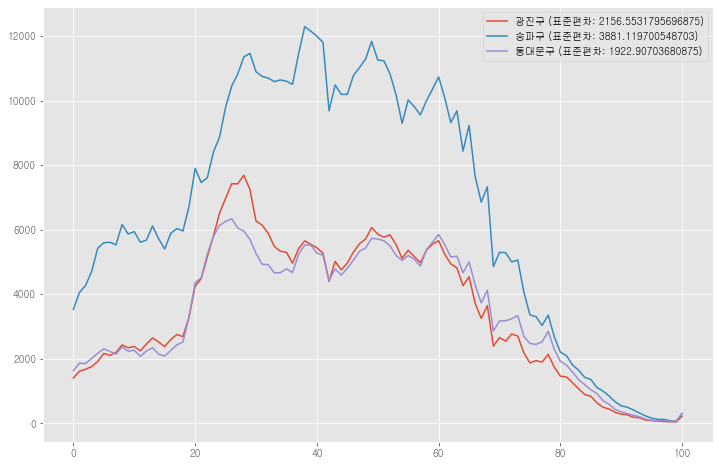

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
df = pd.read_csv('num.csv', encoding='cp949')
allData = np.array(df)
data1 = allData[1:, 3:].copy()

for row in range(data1.shape[0]):
    for col in range(data1.shape[1]):
        data1[row][col] = int(data1[row][col].replace(',',''))

# 행정구역 추가
data = np.insert(data1, 0, allData[1:, 0], axis=1)
maxT = 0
minT = 999999999999

for i in range(data.shape[0]):
    if i == 4: # 광진구 제외
        continue
    total = 0
    for j in range(1, data.shape[1]):
        total = total + (data[i][j] - data[4][j]) ** 2
    if total > maxT:
        maxT = total
        maxIndex = i
    if total < minT:
        minT = total
        minIndex = i

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.plot(data[4][1:], label="{0} (표준편차: {1})".format(data[4][0].split()[1], np.std(data[4][1:])))
plt.plot(data[maxIndex][1:], label="{0} (표준편차: {1})".format(data[maxIndex][0].split()[1], np.std(data[maxIndex][1:])))
plt.plot(data[minIndex][1:], label="{0} (표준편차: {1})".format(data[minIndex][0].split()[1], np.std(data[minIndex][1:])))

plt.legend()
plt.show()